# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [2]:
df1 = pd.read_csv("breast-cancer-wisconsin-data.csv")

In [3]:
df1.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [4]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

In [5]:
df1 = df1.drop(['ID'], axis = 1)

In [6]:
df1_x = df1.drop(['Class'], axis = 1)

In [7]:
df1_x

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
5,8,10,10,8,7,10,9,7,1
6,1,1,1,1,2,10,3,1,1
7,2,1,2,1,2,1,3,1,1
8,2,1,1,1,2,1,1,1,5
9,4,2,1,1,2,1,2,1,1


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [8]:
df1_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
dtypes: int64(8), object(1)
memory usage: 49.2+ KB


In [9]:
df1_x.shape

(699, 9)

In [10]:
df1_x.describe()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [11]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [12]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [13]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [14]:
df1['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [15]:
df1=df1.drop(df1_x[df1_x['Bare Nuclei'] == '?'].index)

In [16]:
df1['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [17]:
df1['Bare Nuclei'] = df1['Bare Nuclei'].astype('float')

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 683 non-null int64
Cell Size                      683 non-null int64
Cell Shape                     683 non-null int64
Marginal Adhesion              683 non-null int64
Single Epithelial Cell Size    683 non-null int64
Bare Nuclei                    683 non-null float64
Normal Nucleoli                683 non-null int64
Bland Chromatin                683 non-null int64
Mitoses                        683 non-null int64
Class                          683 non-null int64
dtypes: float64(1), int64(9)
memory usage: 58.7 KB


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [19]:
# Check for correlation of variable

In [20]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [21]:
#Let us check for pair plots

In [22]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

In [23]:
df1.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
Cell Size,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
Cell Shape,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
Marginal Adhesion,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
Single Epithelial Cell Size,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
Bare Nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Normal Nucleoli,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
Bland Chromatin,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
Mitoses,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448
Class,0.714790,0.820801,0.821891,0.706294,0.690958,0.822696,0.758228,0.718677,0.423448,1.000000


C:\Users\kkishore\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\kkishore\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\kkishore\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\kkishore\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value enco

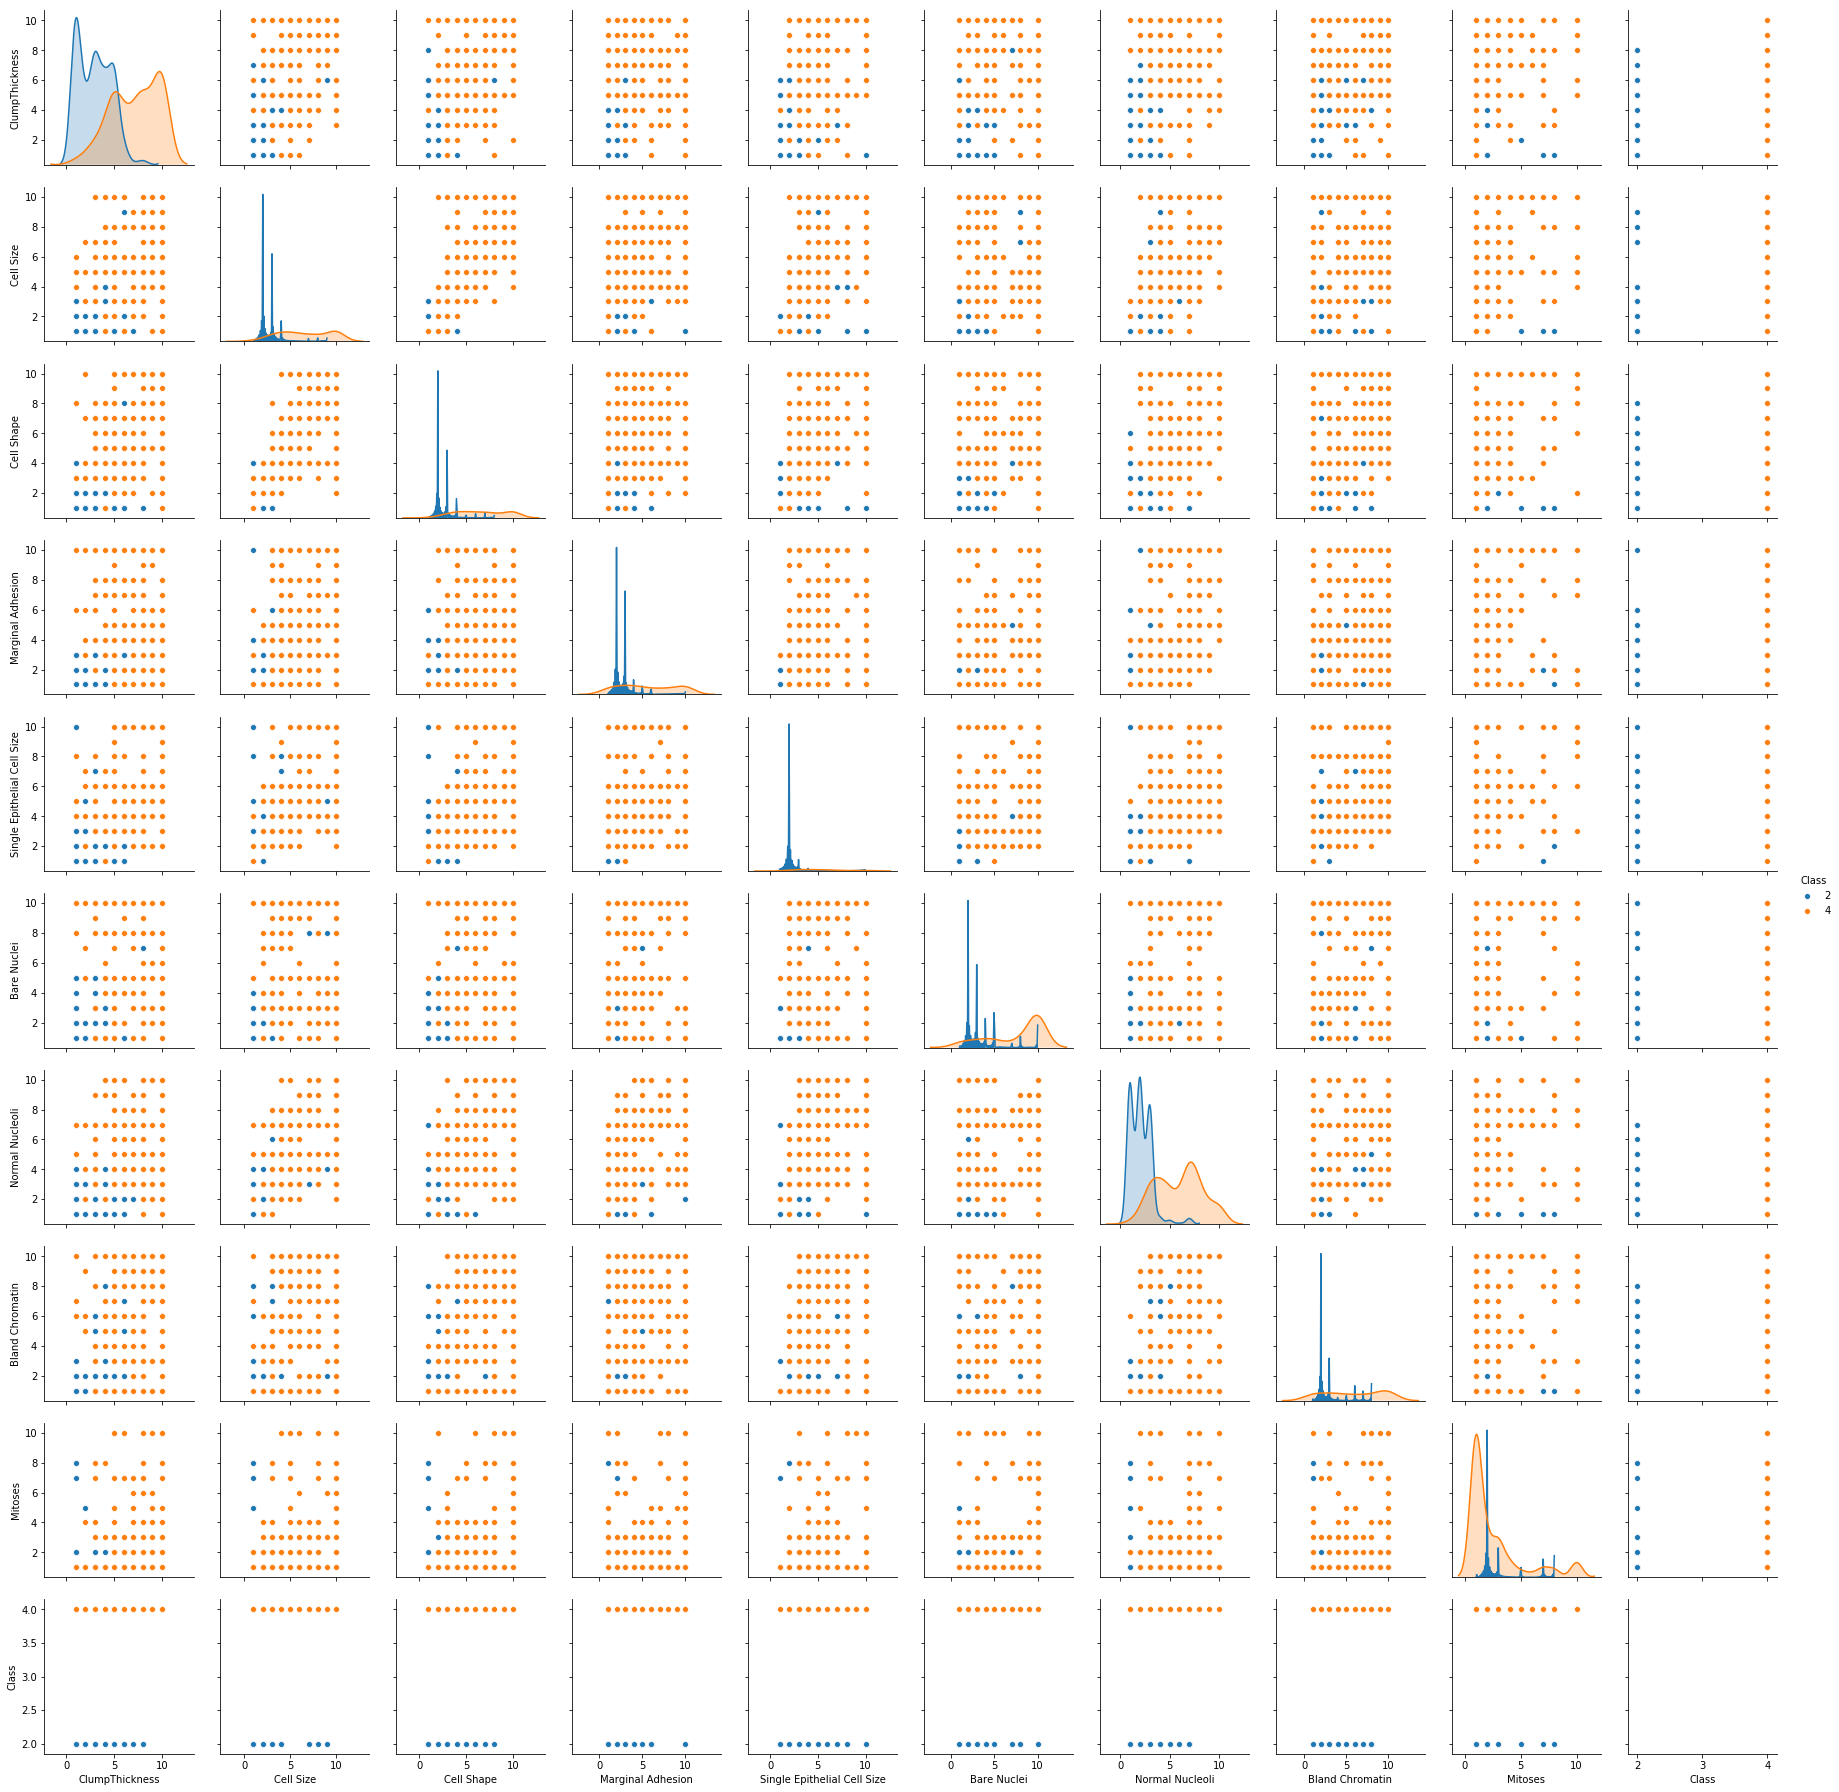

In [24]:
sns.pairplot(df1, hue = "Class")

C:\Users\kkishore\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\kkishore\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\kkishore\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\kkishore\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value enco

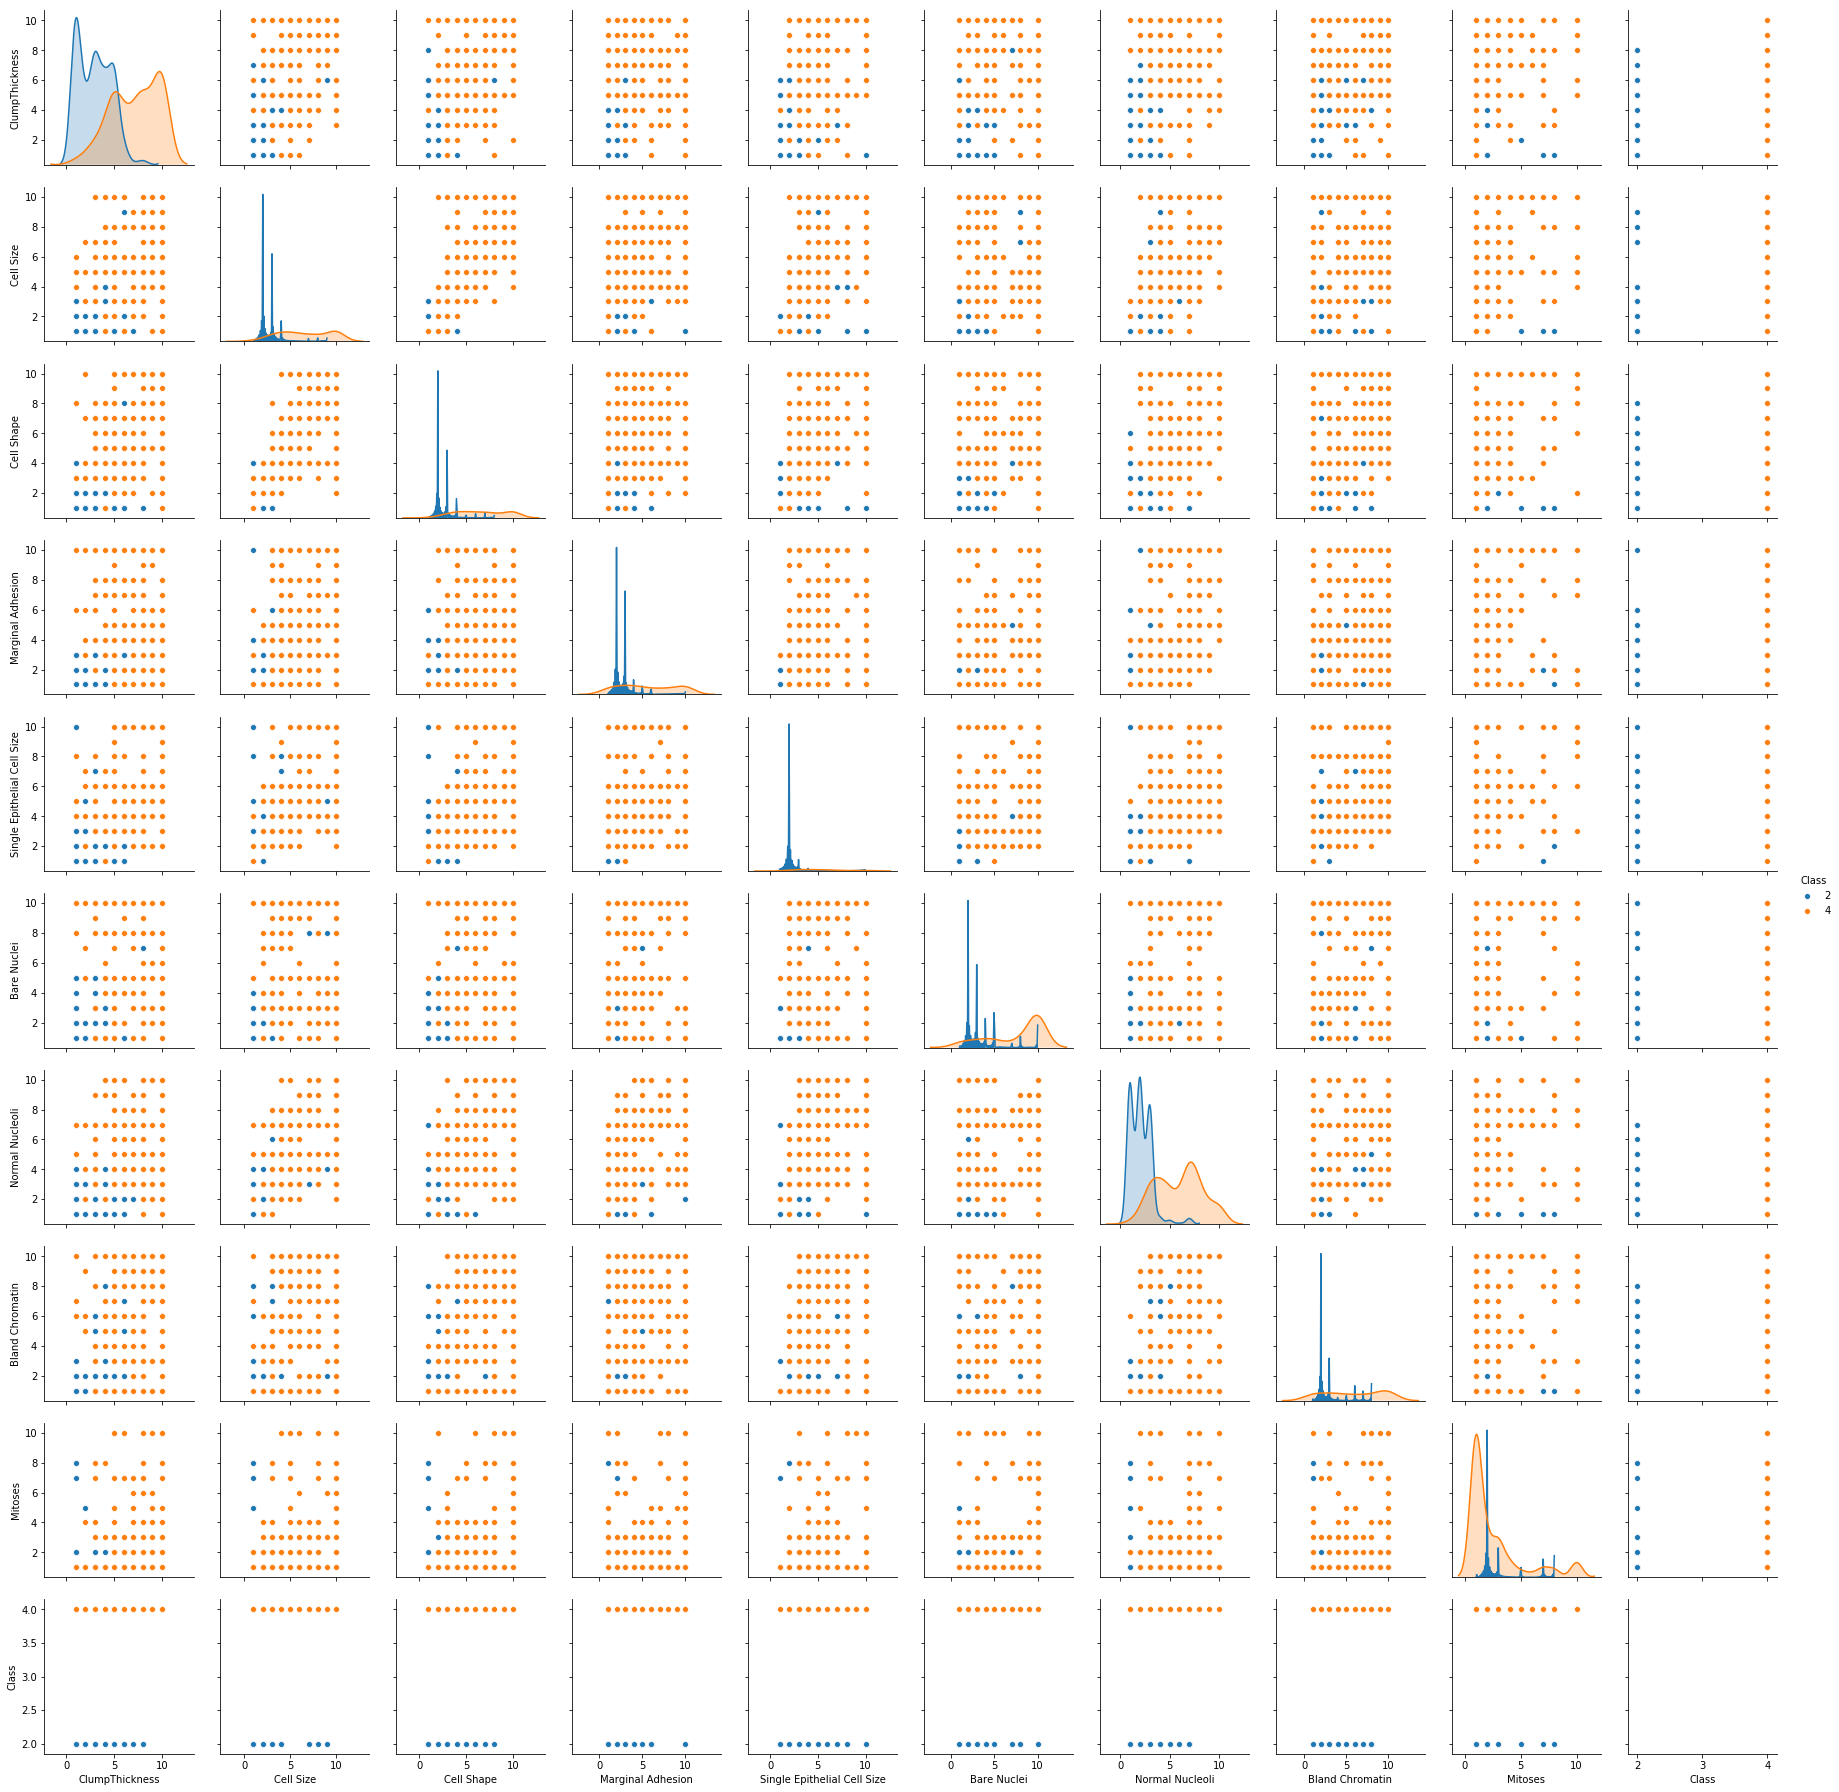

In [25]:
sns.pairplot(df1, diag_kind = "kde", hue = "Class")

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [26]:
# We could see most of the outliers are now removed.

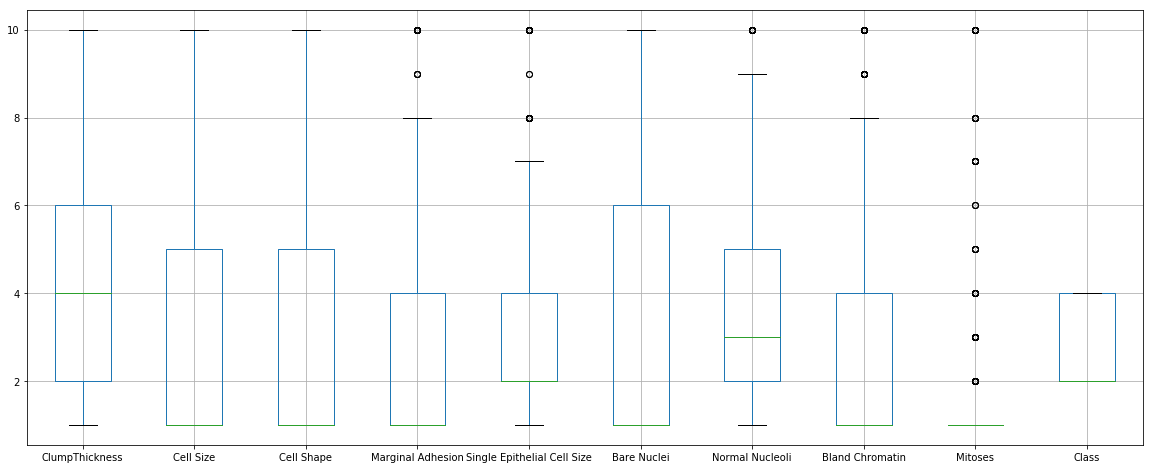

In [27]:
df1.boxplot(figsize = (20,8))

In [28]:
df1['Mitoses'].value_counts()

1     563
2      35
3      33
10     14
4      12
7       9
8       8
5       6
6       3
Name: Mitoses, dtype: int64

In [29]:
df1['Mitoses'] = np.where(df1['Mitoses'] >3, 3, df1['Mitoses'])

In [30]:
df1['Marginal Adhesion'].value_counts()

1     393
3      58
2      58
10     55
4      33
8      25
5      23
6      21
7      13
9       4
Name: Marginal Adhesion, dtype: int64

In [31]:
df1['Marginal Adhesion'] = np.where(df1['Marginal Adhesion'] == 9, 8, df1['Marginal Adhesion'])

In [32]:
df1['Single Epithelial Cell Size'].value_counts()

2     376
3      71
4      48
1      44
6      40
5      39
10     31
8      21
7      11
9       2
Name: Single Epithelial Cell Size, dtype: int64

In [33]:
df1['Single Epithelial Cell Size'] = np.where(df1['Single Epithelial Cell Size'] > 7, 7, df1['Single Epithelial Cell Size'])

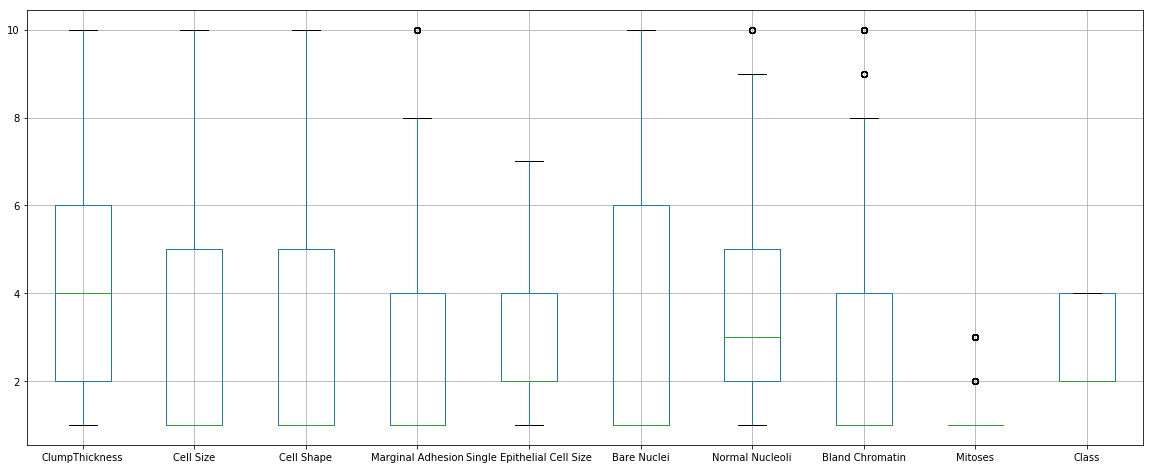

In [34]:
df1.boxplot(figsize = (20,8))

# Q6 Create a covariance matrix for identifying Principal components

In [35]:
# PCA
# Step 1 - Create covariance matrix


In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# importing ploting libraries
import matplotlib.pyplot as plt 
from scipy.stats import zscore
from sklearn import datasets

In [37]:
X_std = StandardScaler().fit_transform(df1)

In [38]:
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00146628 0.64342355 0.65442815 0.48885256 0.55382694 0.59396107
  0.55455439 0.534849   0.42796902 0.71583801]
 [0.64342355 1.00146628 0.90855848 0.7088202  0.78877623 0.69272299
  0.75666702 0.7204008  0.51519694 0.82200496]
 [0.65442815 0.90855848 1.00146628 0.68749339 0.76039892 0.71492429
  0.73642172 0.71901615 0.48621126 0.82309607]
 [0.48885256 0.7088202  0.68749339 1.00146628 0.64083976 0.67171297
  0.67118207 0.60503267 0.47679072 0.70741118]
 [0.55382694 0.78877623 0.76039892 0.64083976 1.00146628 0.63435226
  0.65926545 0.68177015 0.50998751 0.74155495]
 [0.59396107 0.69272299 0.71492429 0.67171297 0.63435226 1.00146628
  0.68161283 0.58513691 0.45017242 0.82390217]
 [0.55455439 0.75666702 0.73642172 0.67118207 0.65926545 0.68161283
  1.00146628 0.66657749 0.40207939 0.75933933]
 [0.534849   0.7204008  0.71901615 0.60503267 0.68177015 0.58513691
  0.66657749 1.00146628 0.49362478 0.71973097]
 [0.42796902 0.51519694 0.48621126 0.47679072 0.50998751 0

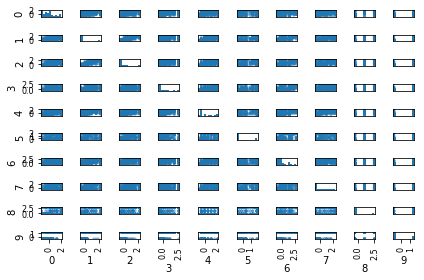

In [39]:
X_std_df = pd.DataFrame(X_std)
axes = pd.plotting.scatter_matrix(X_std_df)
plt.tight_layout()

# Q7 Identify eigen values and eigen vector

In [40]:
# Step 2- Get eigen values and eigen vector

In [41]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [42]:
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.28264087  0.04343079  0.8334781  -0.02193037  0.16420046 -0.10375825
   0.20572206  0.07955081  0.36803832 -0.03509329]
 [ 0.35038582  0.07521292 -0.07439174 -0.73713041 -0.00442668 -0.21380296
  -0.38546252 -0.18893332  0.07277133  0.29558975]
 [ 0.34760929  0.12054925 -0.01246155  0.65038277  0.17763575 -0.19976581
  -0.53892891 -0.11546397  0.00097092  0.25738016]
 [ 0.30685662  0.02484634 -0.36734149  0.03730209 -0.00509905  0.48664727
   0.05658189  0.32222934  0.64362041  0.10372267]
 [ 0.32212359 -0.04928924 -0.19278037  0.06977446  0.05254896 -0.31029817
   0.63043151  0.15900326 -0.24915484  0.51761358]
 [ 0.31653489  0.1571202   0.12056693 -0.1169002   0.39651883  0.55677246
  -0.06360485  0.1917166  -0.57570032 -0.08638528]
 [ 0.31922749  0.2625883  -0.18852928  0.05930016  0.07469894  0.05949741
   0.32811755 -0.73291983  0.07842505 -0.3605252 ]
 [ 0.31003342 -0.06154901 -0.22801275 -0.04418996  0.10524024 -0.47257828
  -0.05461869  0.43276402 -0.0221

# Q8 Find variance and cumulative variance by each eigen vector

In [43]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [44]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 68.85648618  75.66978213  81.20870411  85.90548938  89.35331826
  92.50440359  95.4023008   97.86858647  99.12630268 100.        ]


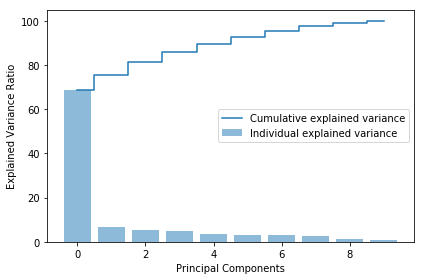

In [45]:
plt.figure(figsize=(6 , 4))
plt.bar(range(10), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(10), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [46]:
from sklearn.decomposition import PCA

In [47]:
pca = PCA(n_components = 6)

In [48]:
pca.fit(X_std_df)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [49]:
X_pca = pca.transform(X_std_df)

In [50]:
X_pca_df = pd.DataFrame(X_pca)

In [51]:
X_pca_df.head()

,0,1,2,3,4,5
0,-1.669794,-0.104500,0.538393,0.109065,-0.180841,-0.330310
1,1.244227,-0.563516,-0.381995,-0.511158,1.544087,0.826203
2,-1.783409,-0.116835,-0.019888,-0.117466,-0.179665,0.088939
3,1.098065,-0.554995,0.177143,1.748304,0.029668,0.028757
4,-1.554793,-0.106523,-0.015012,-0.269153,-0.095625,-0.651270


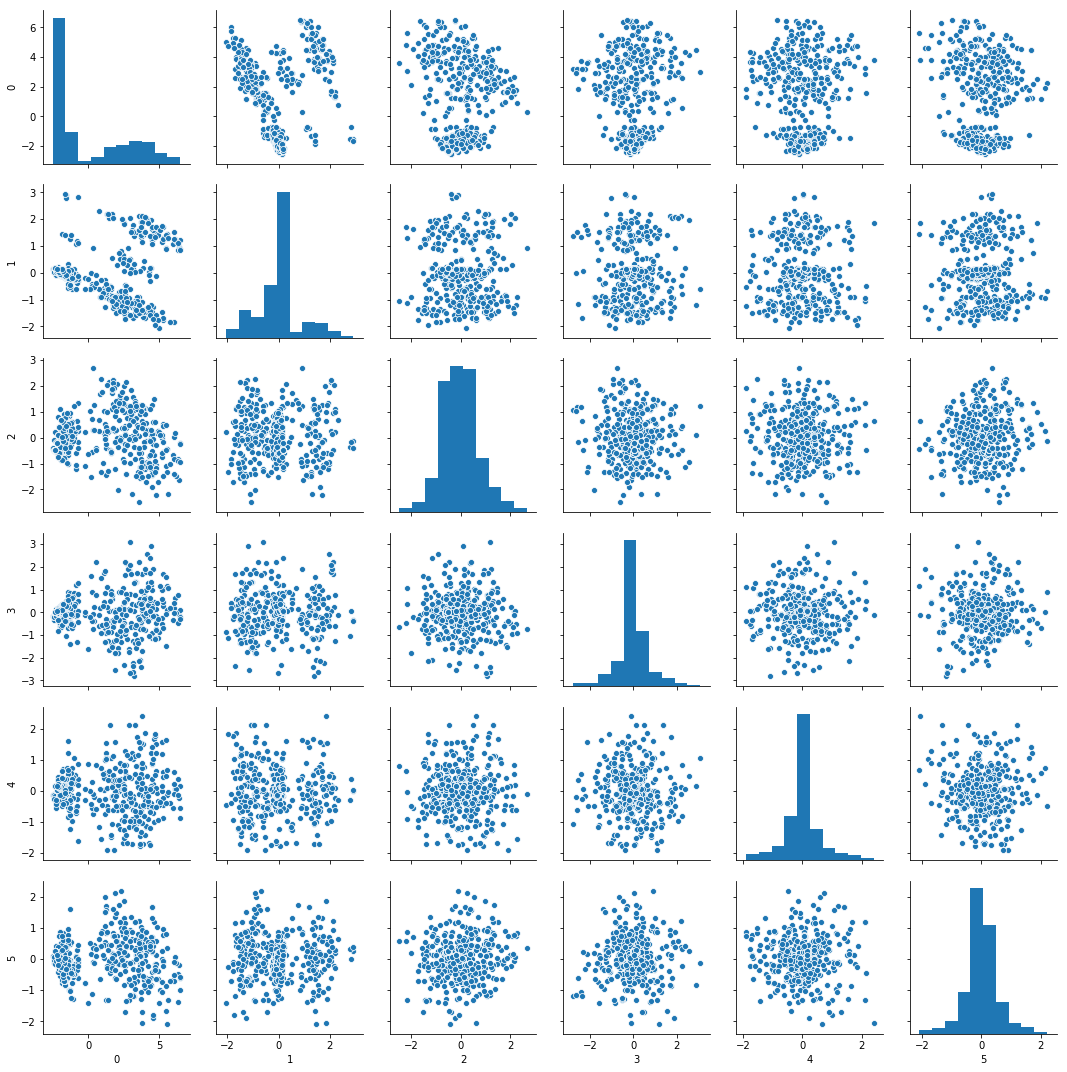

In [52]:
sns.pairplot(X_pca_df)

# Q10 Find correlation between components and features

In [56]:
rel_df = pd.DataFrame(pca.components_,columns=list(df1))
rel_df

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,0.282641,0.350386,0.347609,0.306857,0.322124,0.316535,0.319227,0.310033,0.235776,0.353236
1,-0.043431,-0.075213,-0.120549,-0.024846,0.049289,-0.157120,-0.262588,0.061549,0.932053,-0.093419
2,0.833478,-0.074392,-0.012462,-0.367341,-0.192780,0.120567,-0.188529,-0.228013,0.029604,0.156764
3,0.103758,0.213803,0.199766,-0.486647,0.310298,-0.556772,-0.059497,0.472578,-0.135656,-0.123439
4,-0.035093,0.295590,0.257380,0.103723,0.517614,-0.086385,-0.360525,-0.648833,-0.049860,-0.074550
5,-0.368038,-0.072771,-0.000971,-0.643620,0.249155,0.575700,-0.078425,0.022158,0.040838,0.207812


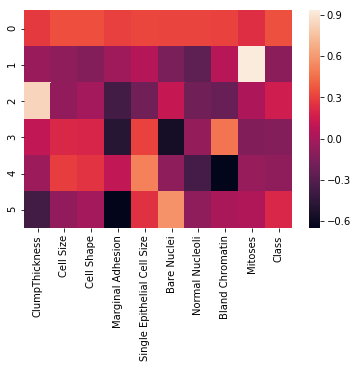

In [57]:
sns.heatmap(rel_df)

# Content Based Recommendation System

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [58]:
jokes_df = pd.read_csv('jokes.csv')

In [59]:
jokes_df.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [66]:
ratings = pd.read_csv('jokes.csv',nrows=200)

In [67]:
#Extarcted only 200 rows only
ratings = jokes_df.drop(['NumJokes'],axis=1)

In [68]:
ratings

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


In [63]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Columns: 101 entries, NumJokes to Joke100
dtypes: float64(100), int64(1)
memory usage: 157.9 KB


# Q22 Change the column indices from 0 to 99

In [69]:
ratings.columns = range(100)

In [79]:
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [71]:
ratings = ratings.replace(99,0)

# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [76]:
ratings_diff = StandardScaler().fit_transform(ratings)

### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [83]:
Ratings_mean = ratings_diff.mean(axis = 1)

In [84]:
Ratings_mean

array([-0.72626303,  0.56264156,  0.61963819, ..., -0.22191566,
       -0.1724862 ,  0.33342704])

In [86]:
Ratings_mean.argsort()[:-11:-1]

array([22710, 23467, 14181,  7931,  4114, 12099,  3358, 13897, 10142,
       11886], dtype=int64)